# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала.

<!--
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

Данный пункт будет делаться на основе следующего звукового файла (взят из теста № 2):

In [ ]:
import IPython
IPython.display.Audio("train_whistle_single_1.wav")

Частота дискретизации: 11025, Число отсчетов: 42624


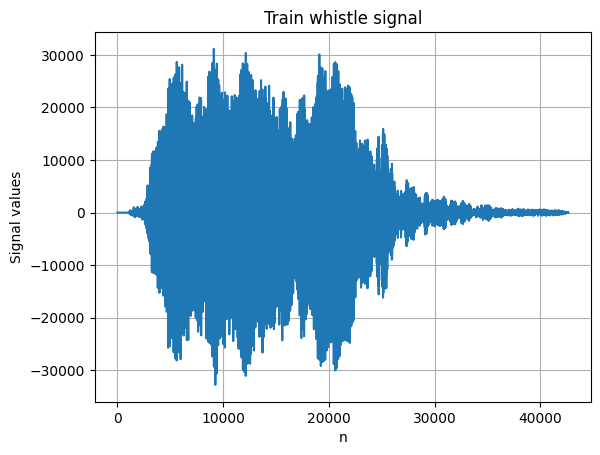

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
Fs, signal = wavfile.read('train_whistle_single_1.wav') # Fs - частота дискретизации, signal - значения амплитуд
print(f"Частота дискретизации: {Fs}, Число отсчетов: {len(signal)}")
signal_len = len(signal)
plt.plot(np.linspace(0, signal_len - 1, signal_len), signal)
plt.xlabel('n')
plt.ylabel('Signal values')
plt.title('Train whistle signal')
plt.grid()
plt.show()

**Что хранится в .wav файле?**

- header - "служебная" информация и информация о сигнале - число каналов, частота дискретизации и т.д.

- data - амплитуды сигнала

**Как узнать параметры дискретизации и квантования .wav файла?**

- Вручную: можно побайтово считать .wav файл и посмотреть, какие значения стоят на 24…27 позициях (частота дискретизации), 34...35 позициях (квантование по уровню в битах), 22...23 позициях (число каналов), 40...43 позициях (можно извлечь число отсчетов):

In [ ]:
import sys
with open('train_whistle_single_1.wav', 'rb') as fd:
  contents = fd.read()
  samp_rate = int.from_bytes(contents[24:28], sys.byteorder, signed=True )
  print('Частота дискретизации (sample rate): ', samp_rate)
  bits_per_samp = int.from_bytes(contents[34:36], sys.byteorder, signed=True )
  print('Число уровней квантования (бит): ', bits_per_samp )
  num_chan = int.from_bytes(contents[22:24], sys.byteorder, signed=True )
  print('Число каналов: ', num_chan)
  sub_chunk_2_size  =  int.from_bytes(contents[40:44], sys.byteorder, signed=True) # число отсчетов * число каналов * число уровней в байтах
  num_samp = int(sub_chunk_2_size/(num_chan * bits_per_samp/8))
  print('Число отсчетов: ', num_samp )

Частота дискретизации (sample rate):  11025
Число уровней квантования (бит):  16
Число каналов:  1
Число отсчетов:  42624


- С помощью библиотек (например, wave):

In [ ]:
import wave
with wave.open('train_whistle_single_1.wav', 'rb') as fd:
  print('Частота дискретизации (sample rate): ', fd.getframerate())
  print('Число уровней квантования (в байтах!): ', fd.getsampwidth() )
  print('Число каналов: ', fd.getnchannels())
  print('Число отсчетов: ', fd.getnframes() )


Частота дискретизации (sample rate):  11025
Число уровней квантования (в байтах!):  2
Число каналов:  1
Число отсчетов:  42624


### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [ ]:
voice_sr, voice = wavfile.read('my_voice.wav') # считывание файла с помощью библиотеки scipy - voice_sr - частота дискретизации, voice - массив амплитуд
wavfile.write("new_voice.wav",11025,voice) # записали файл с тем же количеством отсчетов, но пониженной частотой дискретизации - 9000 отсчетов/сек
print(f"Частота дискретизации: {voice_sr}")

Частота дискретизации: 44100


Нарисуем считанный сигнал:

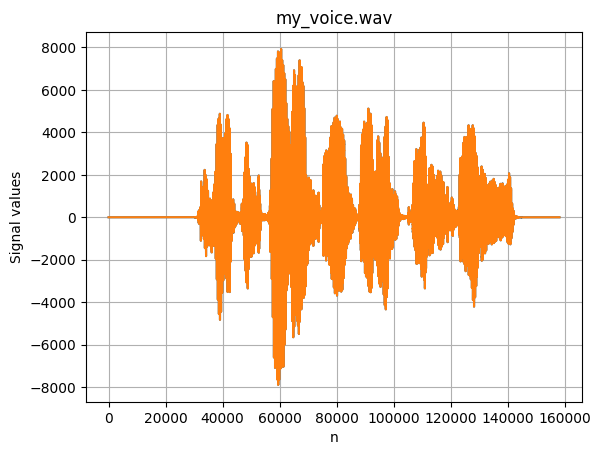

In [ ]:
voice_len = len(voice)
plt.plot(np.linspace(0, voice_len - 1, voice_len), voice)
plt.xlabel('n')
plt.ylabel('Signal values')
plt.title('my_voice.wav')
plt.grid()
plt.show()

Оригинальный сигнал c частотой дискретизации 44100, записанный с помощью Audacity:

In [ ]:
IPython.display.Audio('my_voice.wav')

\Сигнал после изменения частоты дискретизации (11025 отсчетов в секунду) с сохранением отсчетов:

In [ ]:
IPython.display.Audio('new_voice.wav')

При частоте дискретизации в 2 раза меньше (22050) человеческий голос разобрать все еще легко, для частоты 15000 разобрать речь уже сложно, для частоты 11025 распознать речь, не зная заранее, какие слова произносит диктор, практически невозможно

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

Первое,что захотелось проверить - размеры одного файла в представленных форматах. Оказалось, что файл voice.*** весит:
- 617 КБ - .wav
- 45,2 КБ - .mp3
- 52,8 КБ - .ogg

Причина простая, .wav файл - несжатый файл "без потерь" (uncompressed lossless audio format), а файл в других форматах сжимается (перекодируется по определенным правилам, часть информации теряется)

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону.

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время.


In [ ]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10,
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k',
        linewidth = 1)
    plt.grid(which='minor',
        color = 'k',
        linestyle = ':')
    plt.show()

In [ ]:
# Читаем данные с подготовленными сигналами
import pickle
with open("data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

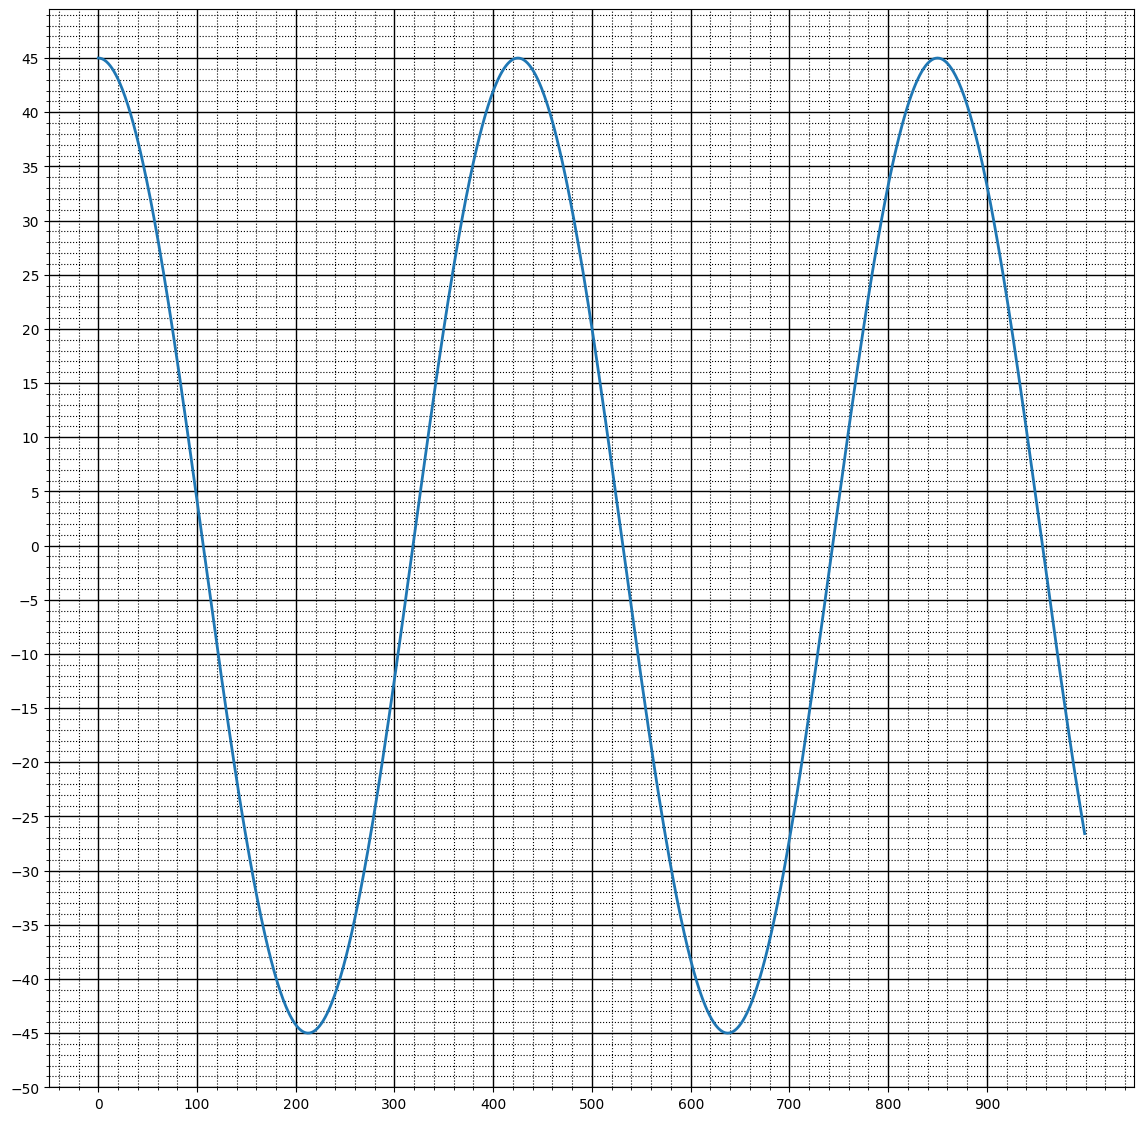

In [ ]:
draw_signal(test_data['task2']['a'])

Из построенного графика можно определить параметры:
- косинус с нулевым сдвигом фазы
- 2*T = 850, значит T = 425
- амплитуда 45

Теперь зададим нужный косинус:

In [ ]:
A = 45 # амплитуда
x = np.arange(1000) # отсчеты по оси "х"
T_а = 425
a = A*np.cos(((2*np.pi)/T_а)*x)

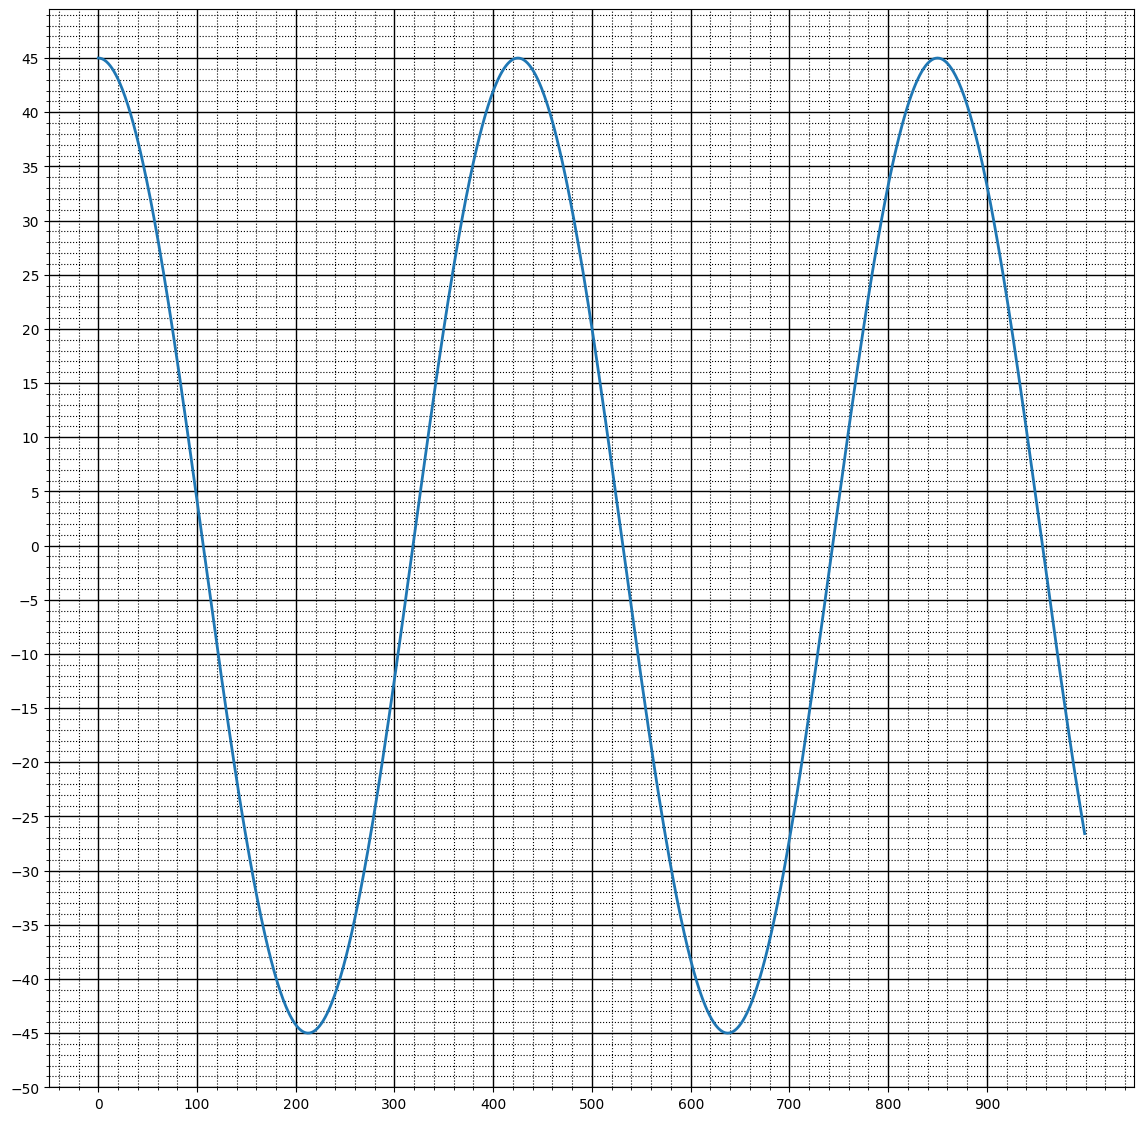

In [ ]:
draw_signal(a)

In [ ]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2π}{425} = 0.01478$

3. Фаза - $\phi= 0$ (косинус со сдвигом 0 или синус со сдвигом π/2)

### Сигнал ***b***

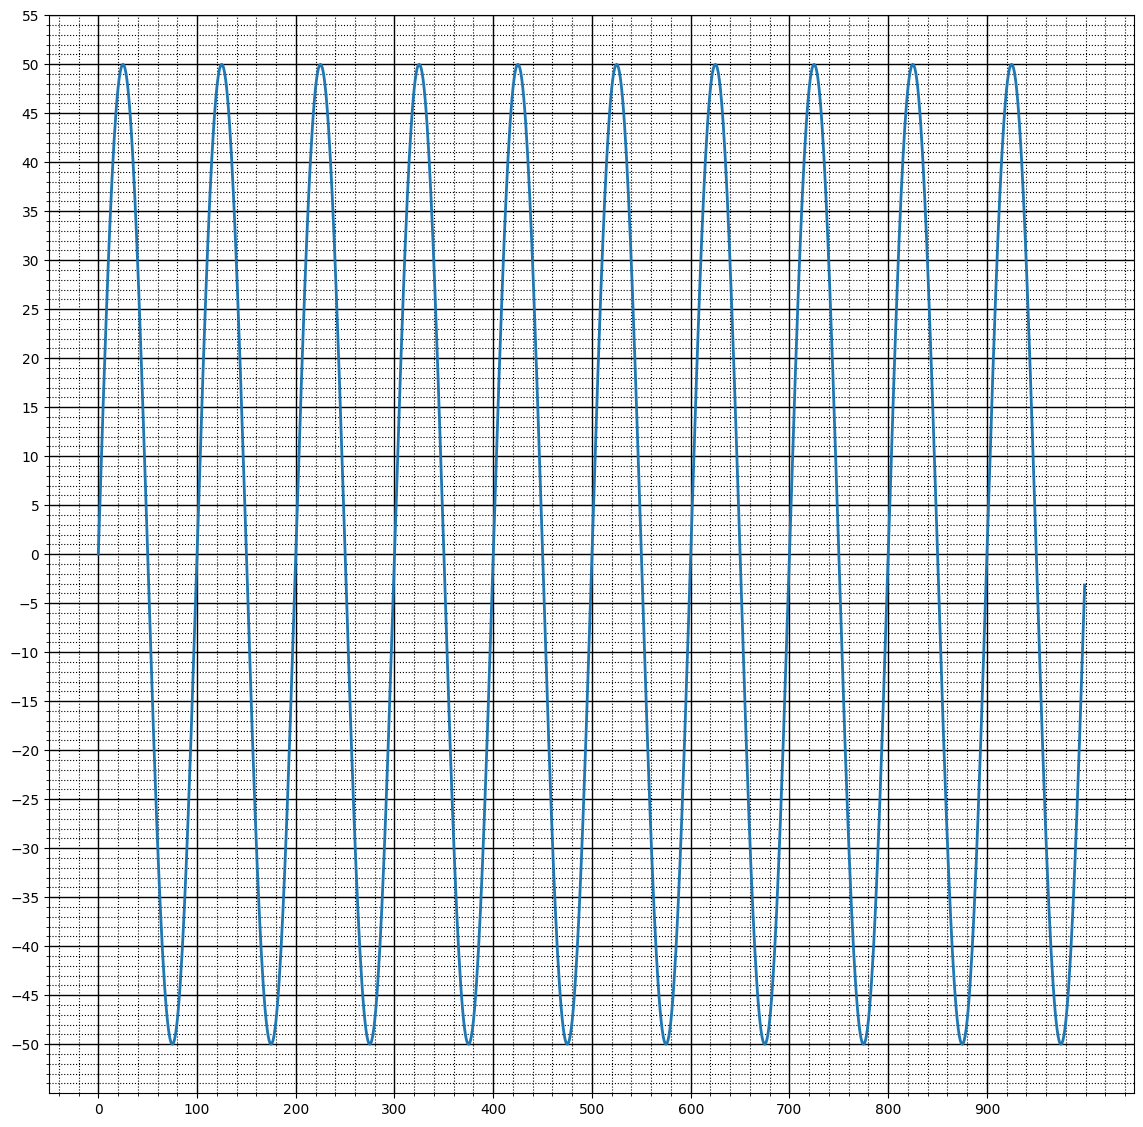

In [ ]:
draw_signal(test_data['task2']['b'])

Из построенного графика можно определить параметры:
- синус с нулевым сдвигом фазы
- T = 100
- амплитуда 50

Теперь зададим нужный синус:

In [ ]:
B = 50 # амплитуда
T_b = 100 # период
b = B*np.sin(((2*np.pi)/T_b)*x)

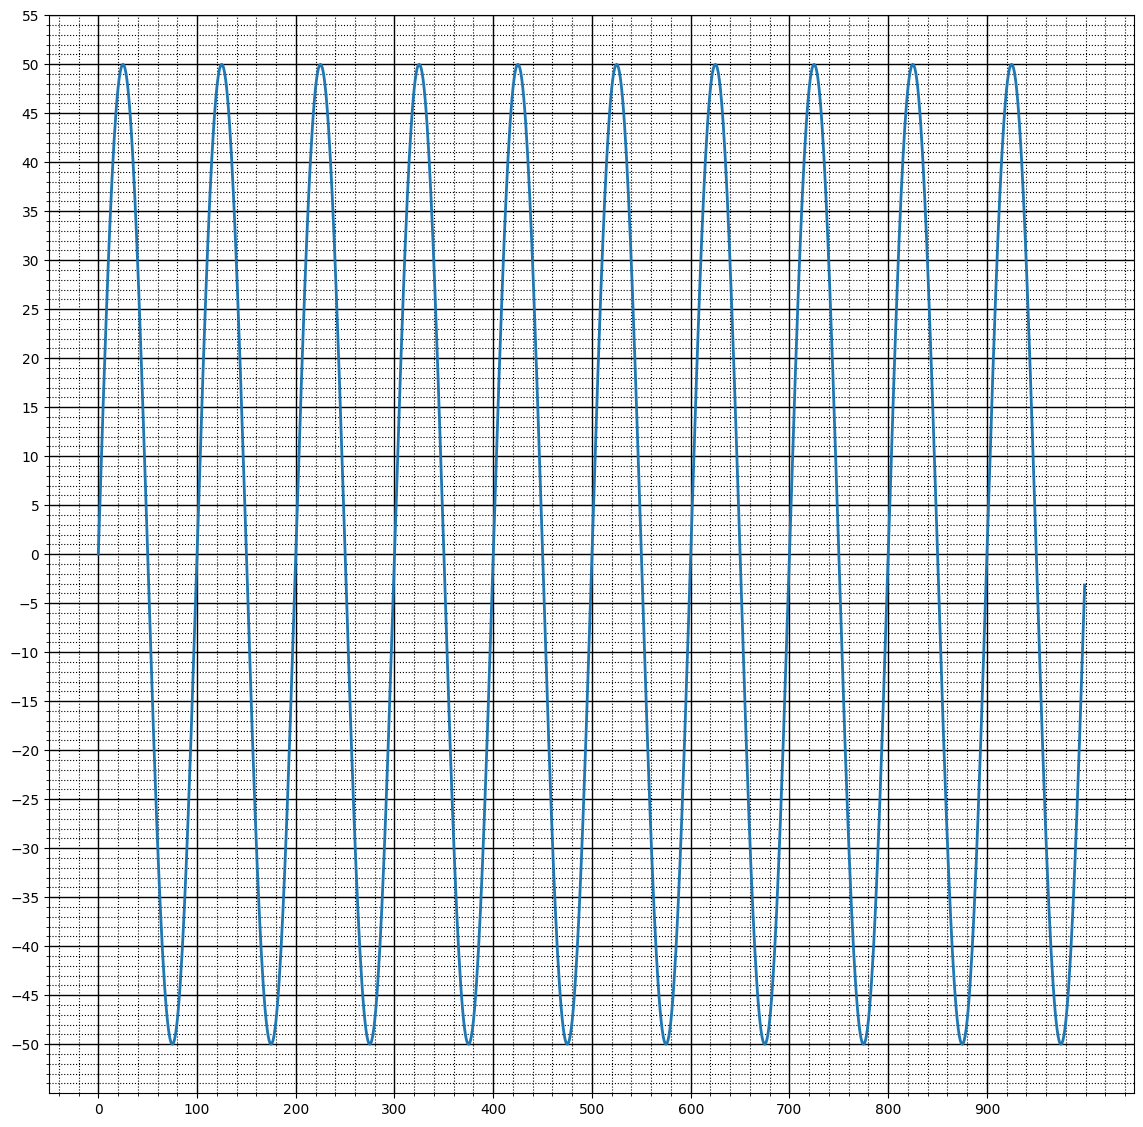

In [ ]:
draw_signal(b)

In [ ]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = \frac{2\pi}{100} = 0.0628$

3. Фаза - $\phi= 0$ - синус с нулевым сдвигом фазы

### Сигнал ***c***

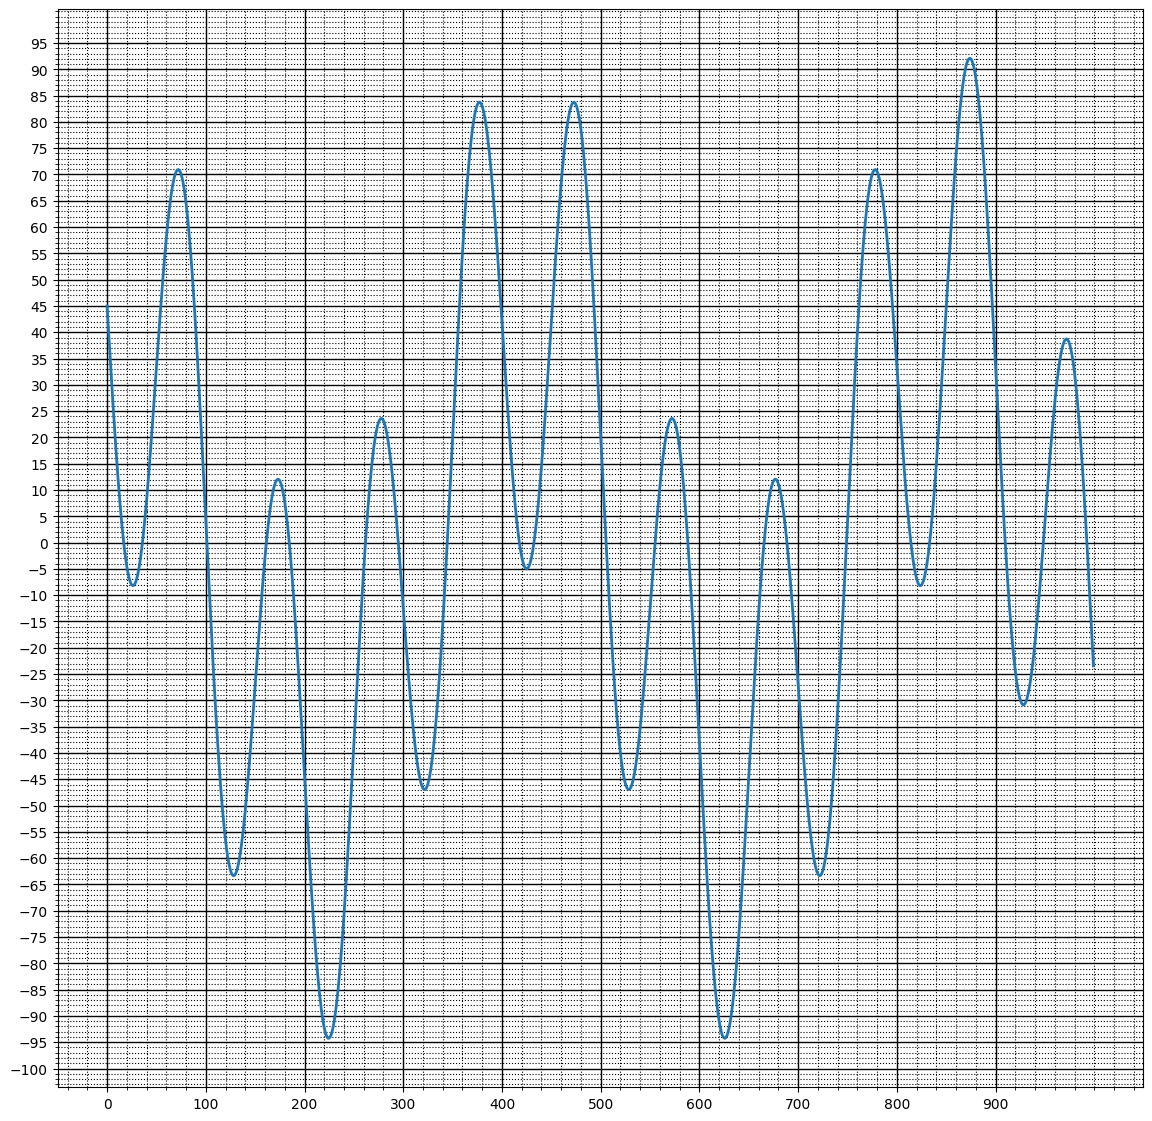

In [ ]:
draw_signal(test_data['task2']['c'])

Чтобы понять, какие это гармоники, посмотрим на спектр:

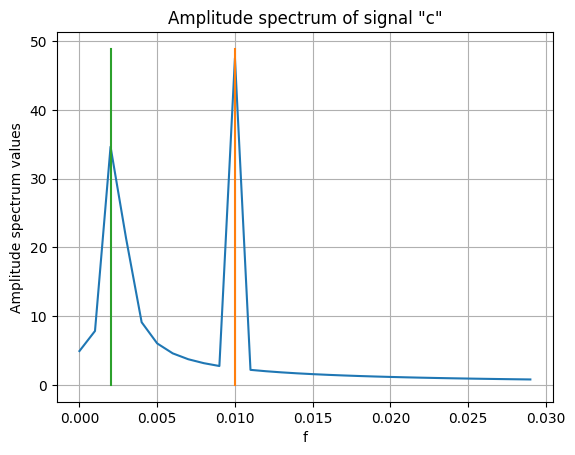

In [ ]:
from scipy.fftpack import fft, fftfreq
signal = test_data['task2']['c']
signal_len = len(signal)
S = fft(signal) # комплексный спектр
k_to_freq = fftfreq(1000, 1)[:30] # возвращает частоты выборки ДПФ
AS = np.abs(S)*2/signal_len # амплитудный спектр

plt.plot(k_to_freq, AS[:30]) # спектр сигнала
plt.plot([0.01]*490, np.arange(0, 49, 0.1)) # вспомогательная прямая на частоте 0.01
plt.plot([0.002]*490, np.arange(0, 49, 0.1)) # вспомогательная прямая на частоте 0.002
plt.xlabel('f')
plt.ylabel('Amplitude spectrum values')
plt.title('Amplitude spectrum of signal "c"')
plt.grid()
plt.show()

Получили спектр, из которого по явно выраженным пикам можно найти приблизительные частоты составляющих:
- f = 0.01 $⟶$ T = 100
- f = 0.002 $⟶$ T = 500

Ввиду определенных эффектов спектр расплывается, и значения неточные, но можно заметить, что они похожи на сигналы a и b. Подберем их линейную комбинацию, которая будет иметь похожий вид.

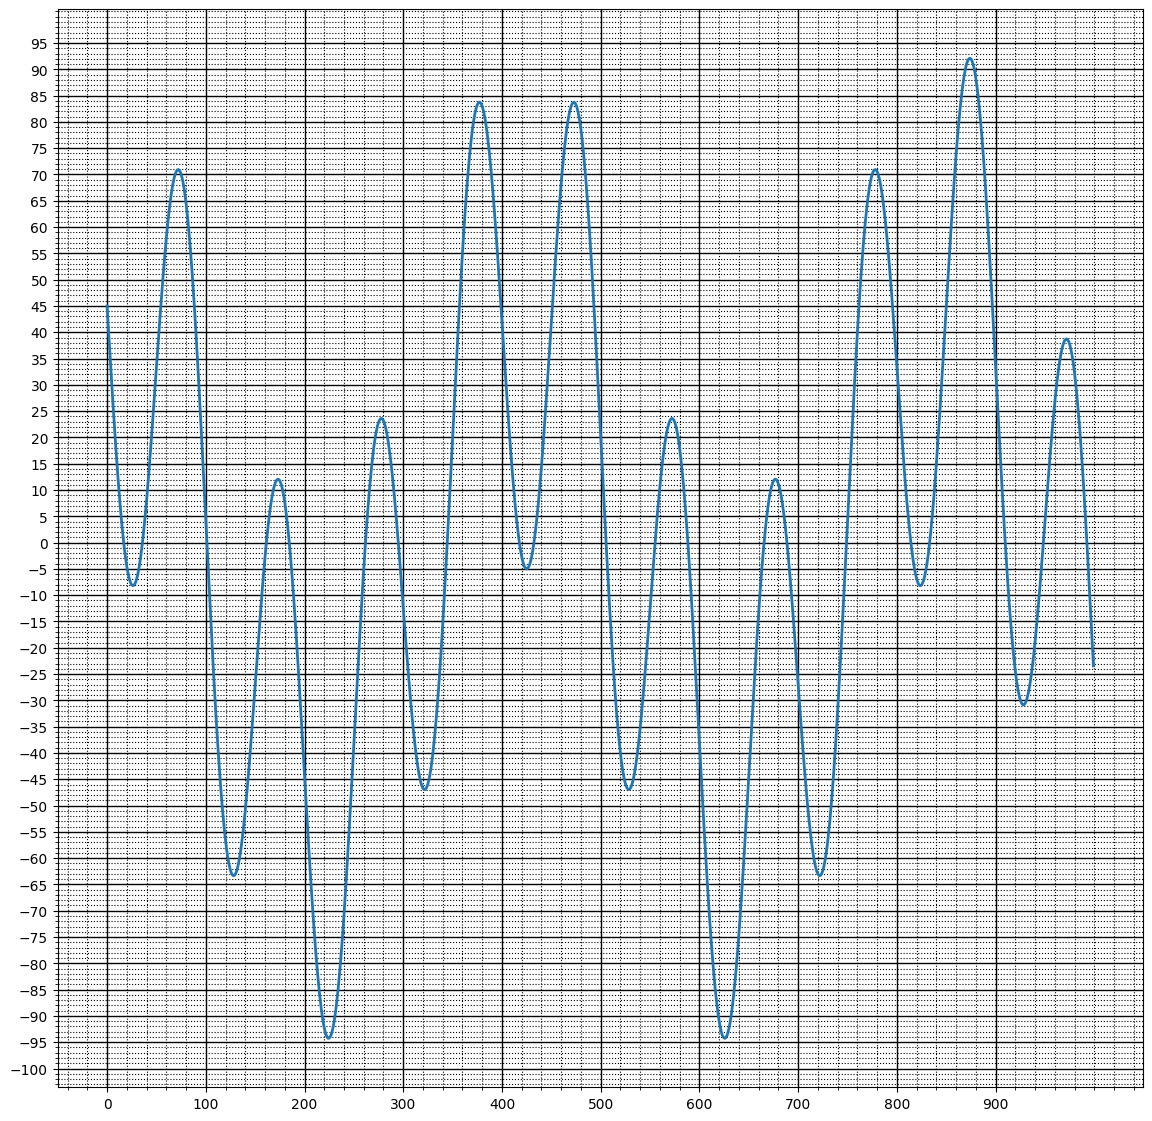

In [ ]:
c = a-b
draw_signal(c)

In [ ]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [ ]:
def convolve(in1, in2):
    in1 = list(in1) # переводим из np.array() в list
    in2 = list(in2) # переводим из np.array() в list
    l_2 = len(in2) # длина импульсной функции
    in2.reverse() # зеркально отразили вторую функцию
    zeros = [0]*(l_2-1) # нули, которыми дополним входной сигнал
    in1 = zeros + in1 # дополнили входной сигнал нулями
    l_out = len(in1) # длина выходного сигнала
    out = [0]*l_out # формируем выходной сигнал, пока что нулевой
    for i in range(l_out-l_2 + 1): # проходимся окошком длиной l_2 пока не достигнем конца массива out и делаем свертку
        for j in range(l_2):
            out[i] += in1[j+i]*in2[j]
    return out
print(convolve([4,2,1,2,3], [1,2,4,2,3])) # ручная проверка для простейшего случая

[4, 10, 21, 20, 27, 0, 0, 0, 0]


In [ ]:
import scipy
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [ ]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [ ]:
test_convolve(a, b, print_debug=False)

Ok!


Если сравнивать свертку, реализованную мной и уже существующую в scipy.signal.convolve, то можно отметить следующее:
- В рукописном варианте не учтено, что иногда нужно свапать a,b, когда это необходимо, в отличие от варианта scipy (ведь свертка коммутативна); P.s.: надеюсь, требовалось написать простейший вариант без обработки кучи граничных условий =)
- В варианте scipy есть дополнительный функционал: можно выбрать "mode" - например, выводить только те отсчеты выходного сигнала, которые сформированы без дополнительных нулей; "method" - можно выбрать метод, которым будет осуществляться свертка, например, прямой (через суммы как в определении) или фурье.
- В реализации scipy в "прямом" методе рассчет происходит при помощи np.correlate(), в методе фурье - scipy.signal.fftconvolve()

### Нарисуйте результат свертки a и b

Сигнал **а**

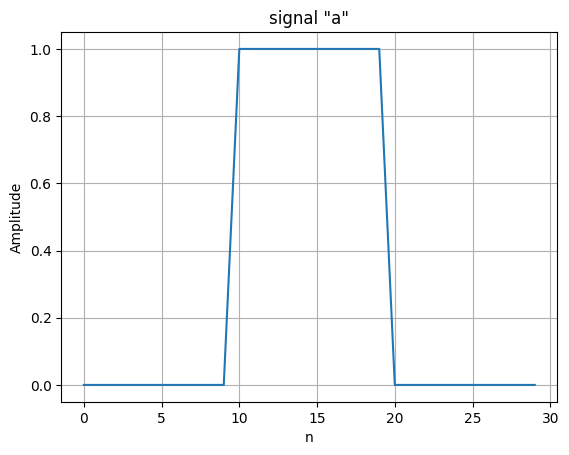

In [ ]:
plt.plot(np.arange(len(a)), a)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('signal "a"')
plt.grid()
plt.show()

Сигнал **b**

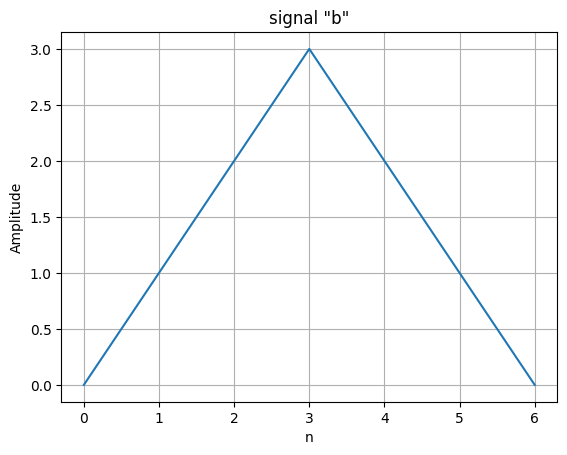

In [ ]:
plt.plot(np.arange(len(b)), b)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('signal "b"')
plt.grid()
plt.show()

Свертка **a** и **b**

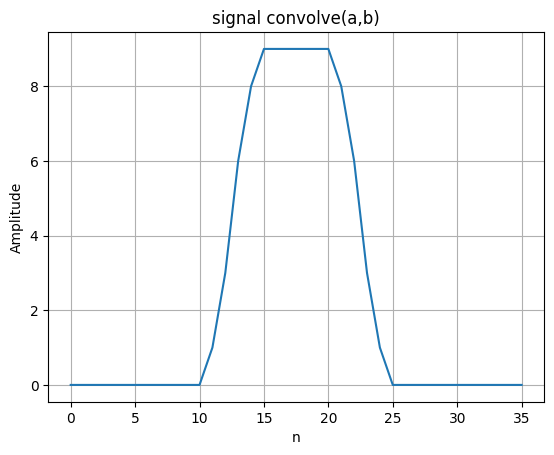

In [ ]:
plt.plot(np.arange(len(b)+len(a)-1), convolve(a,b))
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('signal convolve(a,b)')
plt.grid()
plt.show()

Все 3 графика на одной картинке:

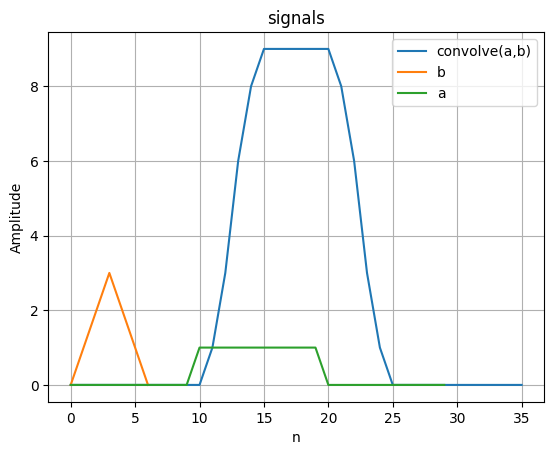

In [ ]:
plt.plot(np.arange(len(a)+len(b)-1), convolve(a,b))
plt.plot(np.arange(len(b)), b)
plt.plot(np.arange(len(a)), a)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('signals')
plt.grid()
plt.legend(['convolve(a,b)', 'b', 'a'])
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат.

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [ ]:
def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise
    len_noise = len(noise) # длина шумового сигнала
    noise_ = noise.copy()
    out = [0]*N # создали массив выходных данных
    out[:len(noise)] = noise # из теста 1 поняли, что сигнал должен начинаться с шума; первые отсчеты = шум
    prev =  0 # храним y(n-1)
    cur = 0 # храним текущий элемент
    for i in range(N-len_noise):
        noise_[cur] = (noise_[cur] + prev)/2
        out[len_noise+i] = noise_[cur]
        prev = out[len_noise+i]
        cur += 1
        if cur == len_noise:
            cur = 0
    return out


    raise NotImplementedError()

In [87]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 82.41
# print(int(sample_rate/frequency))
sec = 2
gen_len = sample_rate * sec
# print(gen_len)
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]
gen_wav = karplus_strong(noise, gen_len)


assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

AssertionError: ignored

### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

E

In [91]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 82.41
# print(int(sample_rate/frequency))
sec = 2
gen_len = sample_rate * sec
# print(gen_len)
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]
E = karplus_strong(noise, 2 * 44100)
IPython.display.Audio(E, rate=44100)



A

In [80]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 110.00
# print(int(sample_rate/frequency))
sec = 2
gen_len = sample_rate * sec
# print(gen_len)
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]
A = karplus_strong(noise, 2 * 44100)
IPython.display.Audio(A, rate=44100)

D

In [81]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 146.82
# print(int(sample_rate/frequency))
sec = 2
gen_len = sample_rate * sec
# print(gen_len)
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]
D = karplus_strong(noise, 2 * 44100)
IPython.display.Audio(D, rate=44100)

G

In [83]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 196.00
# print(int(sample_rate/frequency))
sec = 2
gen_len = sample_rate * sec
# print(gen_len)
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]
G = karplus_strong(noise, 2 * 44100)
IPython.display.Audio(G, rate=44100)

B

In [84]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 246.94
# print(int(sample_rate/frequency))
sec = 2
gen_len = sample_rate * sec
# print(gen_len)
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]
B = karplus_strong(noise, 2 * 44100)
IPython.display.Audio(B, rate=44100)

E_

In [85]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 329.63
# print(int(sample_rate/frequency))
sec = 2
gen_len = sample_rate * sec
# print(gen_len)
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]
E_ = karplus_strong(noise, 2 * 44100)
IPython.display.Audio(E_, rate=44100)

Визуализируем затухание амплитуды:

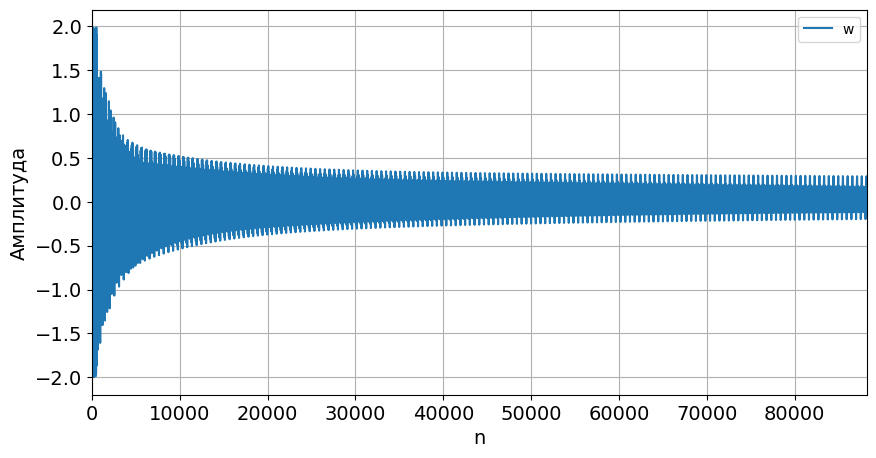

In [95]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend('w')
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

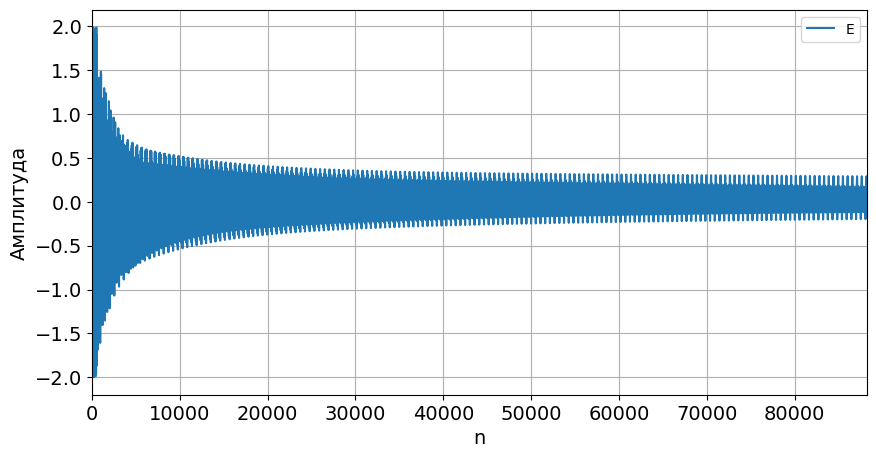

In [96]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), E)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend('E')
plt.grid()

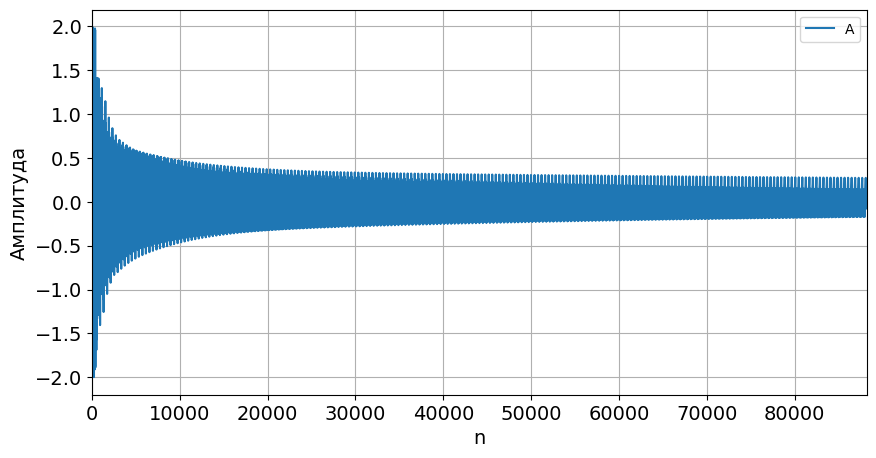

In [73]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), A)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend('A')
plt.grid()

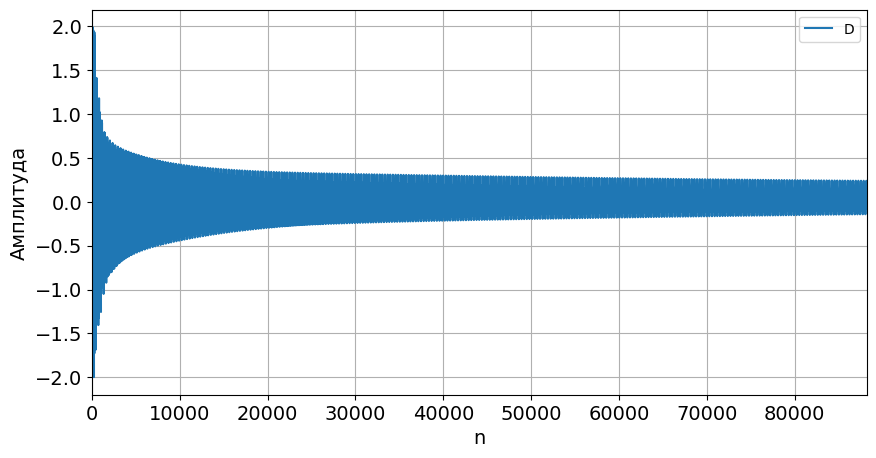

In [74]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), D)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend('D')
plt.grid()

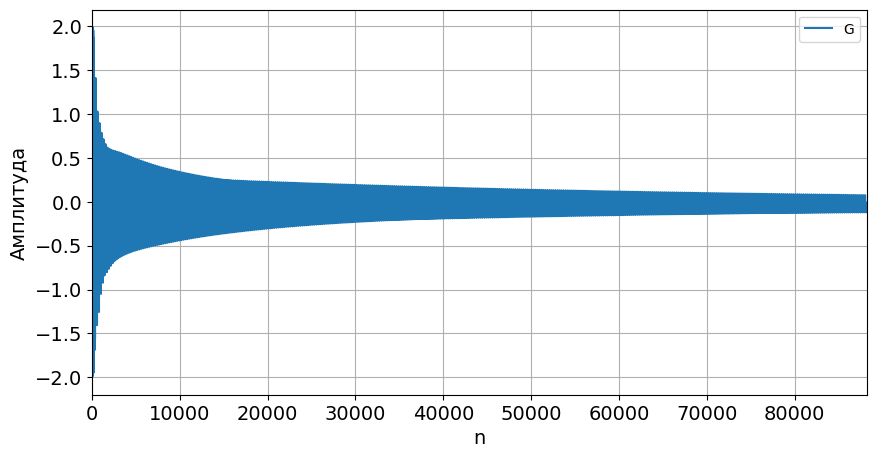

In [75]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), G)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend('G')
plt.grid()

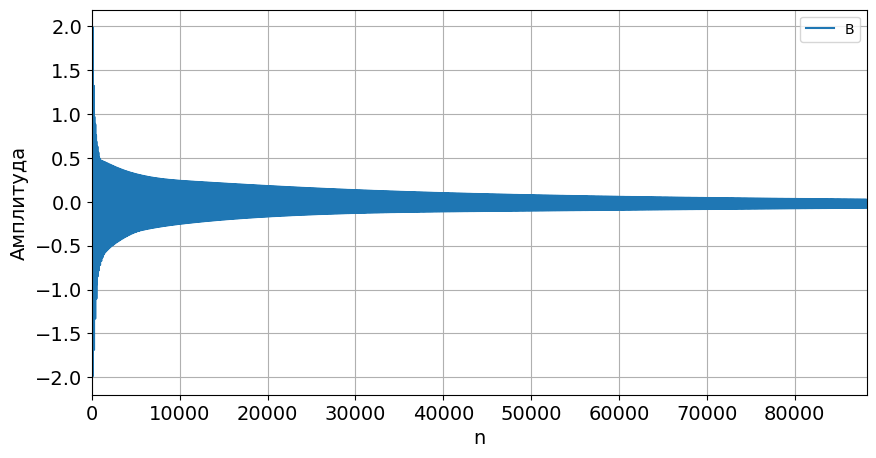

In [76]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), B)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend('B')
plt.grid()

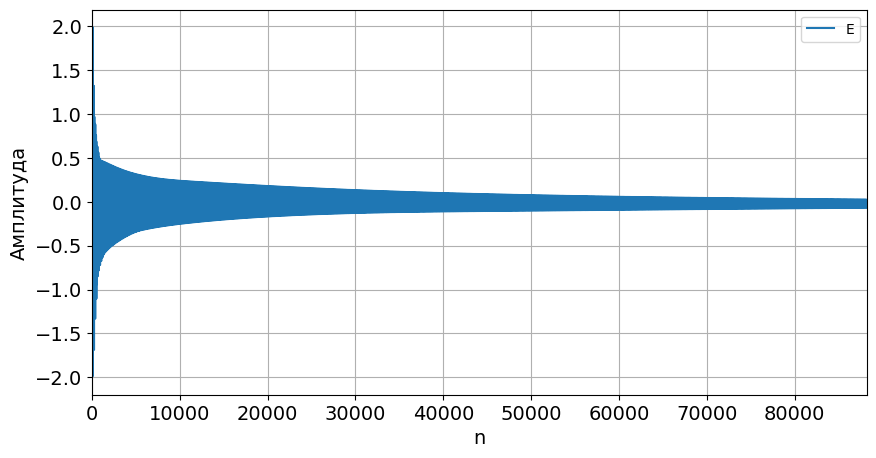

In [77]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), E_)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend('E_')
plt.grid()